In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Story

In [2]:
dataset = pd.read_csv("../data/train/train_feature.csv", index_col='id')
dataset.head()

,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
id,,,,,,,,,,,,,,
1379560,177,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1466964,270,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1346989,189,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1338232,54,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0,Beverages,Indian
1448490,40,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0,Beverages,Indian


In [3]:
categorical_columns = ['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'city_code', 
                       'region_code', 'center_type', 'category', 'cuisine']
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 1379560 to 1361984
Data columns (total 14 columns):
num_orders               456548 non-null int64
week                     456548 non-null category
center_id                456548 non-null category
meal_id                  456548 non-null category
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null category
homepage_featured        456548 non-null category
city_code                456548 non-null category
region_code              456548 non-null category
center_type              456548 non-null category
op_area                  456548 non-null float64
category                 456548 non-null category
cuisine                  456548 non-null category
dtypes: category(10), float64(3), int64(1)
memory usage: 22.2 MB


### What is the total trend of orders ?

In [4]:
overall_orders_trend = dataset[['week', 'num_orders']].groupby('week').sum()
overall_orders_trend.head()

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675


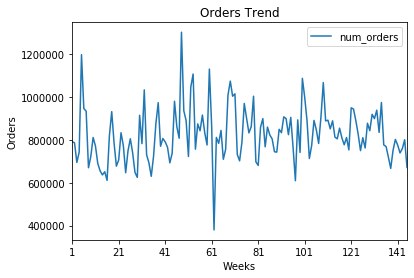

In [5]:
overall_orders_trend.reset_index().plot('week', 'num_orders')
_ = plt.title("Orders Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

There were maximum orders in week 48 and 5 and minimum orders in week 62. These raises below questions:
1. What went good in week 48 and 5 ?
2. What went wrong in week 62 ?

#### Compare week 62 and week 48

In [6]:
dataset_week_62 = dataset[dataset.week == 62]
dataset_week_62.head()

,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
id,,,,,,,,,,,,,,
1060959,108,62,55,1885,143.59,143.59,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1016680,53,62,55,1993,142.59,143.59,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1178978,94,62,55,2539,147.50,145.50,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1184367,14,62,55,2139,275.48,276.48,0,0,647,56,TYPE_C,2.0,Beverages,Indian
1370000,54,62,55,2631,153.26,154.26,0,0,647,56,TYPE_C,2.0,Beverages,Indian


In [7]:
dataset_week_48 = dataset[dataset.week == 48]
dataset_week_48.head()

,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
id,,,,,,,,,,,,,,
1078055,366,48,55,1885,122.25,145.53,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1343992,284,48,55,1993,121.28,145.56,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1243384,161,48,55,2539,119.31,144.53,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1330205,26,48,55,2139,298.82,298.82,0,0,647,56,TYPE_C,2.0,Beverages,Indian
1072054,80,48,55,2631,150.35,150.35,0,0,647,56,TYPE_C,2.0,Beverages,Indian


Let's compare the distribution of num_orders

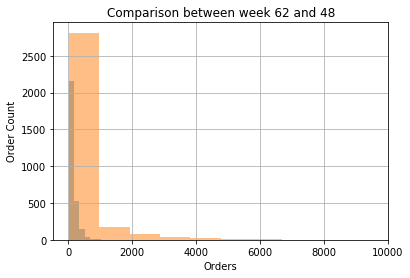

In [8]:
dataset_week_62.num_orders.hist(alpha=0.5)
dataset_week_48.num_orders.hist(alpha=0.5)

_ = plt.xlabel('Orders')
_ = plt.ylabel('Order Count')
_ = plt.title('Comparison between week 62 and 48')
plt.show()

<p>There is a hugh difference between the distribution.</p>

In [9]:
dataset_week_62.emailer_for_promotion.value_counts()

0    2715
1     175
Name: emailer_for_promotion, dtype: int64

In [10]:
dataset_week_48.emailer_for_promotion.value_counts()

0    2729
1     401
Name: emailer_for_promotion, dtype: int64

There were almost double promotional activity, by email, in week 48 as compare to week 62. Hence, there is hugh difference in number of orders.

### What is the trend in Meal?

In [11]:
cuisine_trend = dataset.pivot_table(index='week', columns='cuisine', values='num_orders', aggfunc='sum')
cuisine_trend.head()

cuisine,Continental,Indian,Italian,Thai
week,,,,
1,146020,175317,228836,242088
2,133570,177109,202627,273778
3,97977,150148,197299,249838
4,118819,155239,192265,277206
5,116077,683532,169161,229905


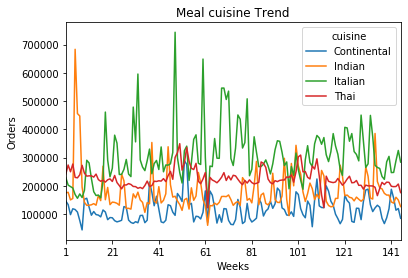

In [12]:
cuisine_trend.plot()
_ = plt.title("Meal cuisine Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

Below points can be concluded from above plot:
1. Customers really likes Italian meals
2. Continental meals have consistently lower orders as compare to other cuisine
3. There is fluctuations in Indian meals

In [13]:
category_trend = dataset.pivot_table(index='week', columns='category', values='num_orders', aggfunc='sum')
category_trend = category_trend.fillna(0)
category_trend.head()

category,Beverages,Biryani,Desert,Extras,Fish,Other Snacks,Pasta,Pizza,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters
week,,,,,,,,,,,,,,
1,322382.0,8309.0,16095.0,30651.0,0.0,34302.0,18720.0,60999.0,137916.0,0.0,113218.0,10558.0,5070.0,34041.0
2,381602.0,6638.0,11506.0,29102.0,0.0,34621.0,17741.0,53729.0,109530.0,0.0,94048.0,9927.0,4813.0,33827.0
3,332159.0,6930.0,10853.0,29833.0,0.0,33038.0,18425.0,29590.0,101579.0,0.0,82063.0,9943.0,4551.0,36298.0
4,345707.0,6162.0,11425.0,38935.0,0.0,41500.0,9719.0,38632.0,109936.0,0.0,80333.0,12527.0,5490.0,43163.0
5,280863.0,5572.0,12062.0,30328.0,0.0,24157.0,9867.0,31206.0,642726.0,0.0,71882.0,43585.0,3994.0,42433.0


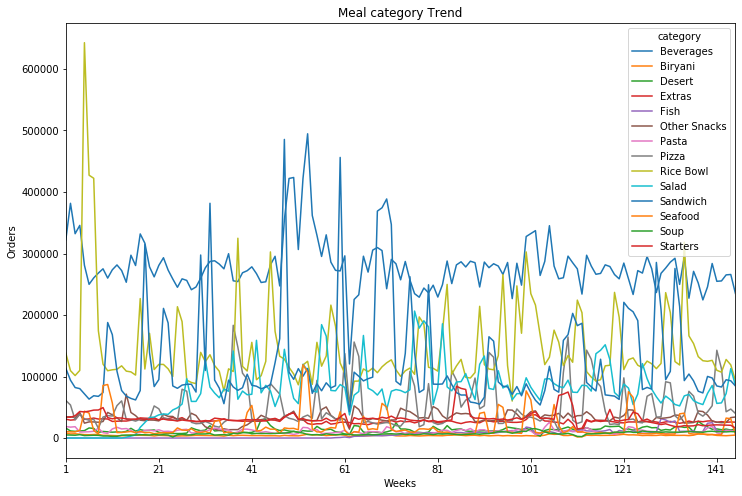

In [14]:
category_trend.plot(figsize=(12, 8))
_ = plt.title("Meal category Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

Below points can be concluded from above plot:
1. Customers mostly orders Beverages
2. Many categories, like Soup, Pizza and Fish, with low orders
3. There is fluctuations in Sandwich and Rice Bowl
4. After week 18, Salad became popular with customers.

### What is the trend in Centers ?

In [15]:
center_type_trend = dataset.pivot_table(index='week', columns='center_type', values='num_orders', aggfunc='sum')
center_type_trend.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 145 entries, 1 to 145
Data columns (total 3 columns):
TYPE_A    145 non-null int64
TYPE_B    145 non-null int64
TYPE_C    145 non-null int64
dtypes: int64(3)
memory usage: 9.8 KB


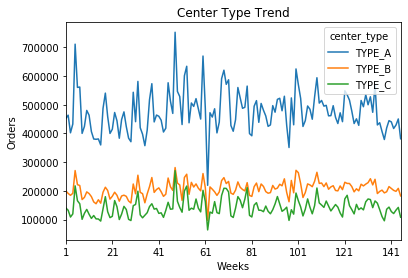

In [16]:
center_type_trend.plot()
_ = plt.title("Center Type Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

Center type TYPE_A always has more orders than other 2 types

In [17]:
city_code_trend = dataset.pivot_table(index='week', columns='city_code', values='num_orders', aggfunc='sum')
city_code_trend.head()

city_code,456,461,473,478,485,515,517,522,526,541,...,683,685,693,695,698,699,700,702,703,713
week,,,,,,,,,,,,,,,,,,,,,
1,14012,7307,6937,4353,9032,6097,20816,23458,57069,4538,...,7508,18453,4174,6462,12102,26305,21636,3782,11198,17290
2,11926,7152,7154,5086,10591,6079,19427,22544,57848,4764,...,6516,19280,4656,7199,11098,22305,20134,5818,11210,16146
3,11843,5904,7071,3643,9016,5085,18593,19724,50299,3642,...,5414,17420,3895,4921,9606,18572,18705,4530,9583,14188
4,14507,6704,6105,3371,7551,4478,22058,23202,52342,4029,...,5391,17608,3737,5113,10714,20855,20439,5149,11257,16899
5,21655,10597,12576,6683,14191,9513,31421,32391,93464,7996,...,9926,28963,6627,10285,14310,36289,26952,7045,22671,21045


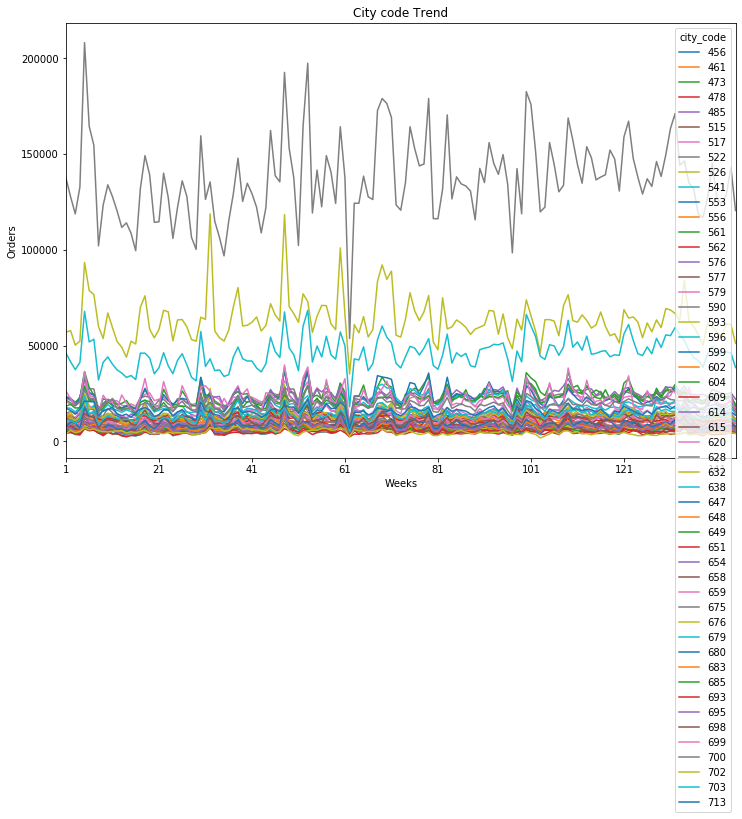

In [18]:
city_code_trend.plot(figsize=(12, 8))
_ = plt.title("City code Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

Below points can be concluded from above plot:
1. City code 590 has highest orders
2. City codes 526 and 638 has more orders than other city codes except 590
3. There is not much fluctuations

In [19]:
region_code_trend = dataset.pivot_table(index='week', columns='region_code', values='num_orders', aggfunc='sum')
region_code_trend.head()

region_code,23,34,35,56,71,77,85,93
week,,,,,,,,
1,12102,148764,3782,410398,11372,131517,66581,7745
2,11098,158074,5818,386677,11650,145720,59858,8189
3,9606,134677,4530,352075,10458,123555,53061,7300
4,10714,136537,5149,401614,11782,111297,59239,7197
5,14310,238667,7045,621244,23653,210571,71093,12092


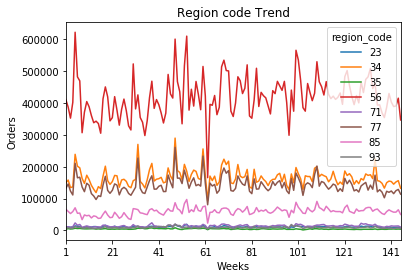

In [20]:
region_code_trend.plot()
_ = plt.title("Region code Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

Below points can be concluded from above plot:
1. Region code 56 has highest orders
2. Region code 34, 77 and 85 has medium orders
3. There is not much fluctuations

In [21]:
op_area_trend = dataset.copy()
op_area_trend['op_area'] = np.floor(op_area_trend['op_area'])
op_area_trend = op_area_trend.pivot_table(index='week', columns='op_area', values='num_orders', aggfunc='sum')
op_area_trend.head()

op_area,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
week,,,,,,,,
1,3451,4273,72656,232177,290586,78431,54858,55829
2,2707,2760,71541,229199,299246,81886,48464,51281
3,1523,2533,59397,201039,259822,73839,49349,47760
4,2507,3548,66331,213078,275470,79756,51501,51338
5,3464,6111,109373,324566,471833,131287,74117,77924


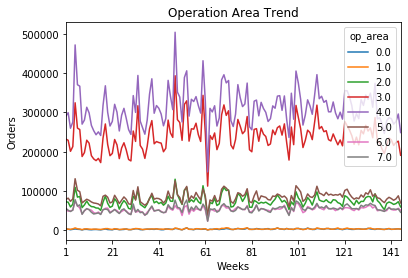

In [22]:
op_area_trend.plot()
_ = plt.title("Operation Area Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

Below points can be concluded from above plot:
1. Centers with operation areas between 3 and 5 has highest orders
2. Centers with operation areas less than 2 has lowest orders

# Summary

1. There were less orders in week 62 and week high orders in week 48 because of emailer promotion activity
2. Customers orders Italian meals and Beverages
3. There is fluctuation in orders of Indian meals, Rice Bowl and Sandwich
4. After week 18, Salad gain popularity among customers
5. TYPE_A Centers get more orders than TYPE_B and TYPE_C centers
6. Centers with city_code 590 and/or region 56 gets more orders than any other centers
7. Centers operating in areas between 3 $km^{2}$ and 5 $km^{2}$ has highest orders
8. Centers operating under 2 $km^{2}$ has lowest orders